In [27]:
#imports
import pandas as pd
import numpy as np
import wbdata
from pprint import pprint
import requests
import wbpy
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
c_api = wbpy.ClimateAPI()
#setting list of countries
countries_l = ["Aruba",
"Andorra",
"United Arab Emirates",
"Argentina",
"Antigua and Barbuda",
"Australia",
"Austria",
"Belgium",
"Bahrain",
"Bahamas, The",
"Bermuda",
"Barbados",
"Brunei Darussalam",
#"Canada",
"Switzerland",
"Chile",
#"Curacao",
"Cayman Islands",
"Cyprus",
"Czech Republic",
"Germany",
"Denmark",
"Spain",
"Estonia",
"Finland",
"France",
"Faroe Islands",
"United Kingdom",
"Gibraltar",
"Greece",
"Greenland",
"Guam",
"Hong Kong SAR, China",
"Croatia",
"Hungary",
"Isle of Man",
"Ireland",
"Iceland",
"Israel",
"Italy",
"Japan",
"St. Kitts and Nevis",
"Korea, Rep.",
"Kuwait",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Latvia",
"Macao SAR, China",
#"St. Martin (French part)",
"Monaco",
"Malta",
"Northern Mariana Islands",
"New Caledonia",
"Netherlands",
"Norway",
"New Zealand",
"Oman",
"Panama",
"Palau",
"Poland",
"Puerto Rico",
"Portugal",
"French Polynesia",
"Qatar",
"Saudi Arabia",
"Singapore",
"San Marino",
"Slovak Republic",
"Slovenia",
"Sweden",
#"Sint Maarten (Dutch part)",
"Seychelles",
"Turks and Caicos Islands",
"Trinidad and Tobago",
"Taiwan, China",
"Uruguay",
"United States",
"British Virgin Islands",
"Virgin Islands (U.S.)"]


In [13]:
#putting list of iso codes and commenting out those without data
iso_and_basin_codes = ['ABW',
 'AND',
 'ARE',
 'ARG',
 'ATG',
 'AUS',
 'AUT',
 'BEL',
 'BHR',
 'BHS',
 'BMU',
 'BRB',
 'BRN',
# 'CAN',
 'CHE',
# 'CHI',
 'CHL',
 #'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'FRO',
 'GBR',
 'GIB',
 'GRC',
 'GRL',
 'GUM',
 'HKG',
 'HRV',
 'HUN',
 'IMN',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JPN',
 'KNA',
 'KOR',
 'KWT',
 'LIE',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 #'MAF',
 'MCO',
 'MLT',
 'MNP',
 'NCL',
 'NLD',
 'NOR',
 'NZL',
 'OMN',
 'PAN',
 'PLW',
 'POL',
 'PRI',
 'PRT',
 'PYF',
 'QAT',
 'SAU',
 'SGP',
 'SMR',
 'SVK',
 'SVN',
 'SWE',
 #'SXM',
 'SYC',
 'TCA',
 'TTO',
 'TWN',
 'URY',
 'USA',
 'VGB',
 'VIR']

In [14]:
#pulling the data and converting it to dictionary
dataset_temp = c_api.get_instrumental(data_type="tas", interval="year", locations=iso_and_basin_codes)
temp_dict = dataset_temp.as_dict()
temp_dict

{'ABW': {'1901': 27.633335,
  '1902': 27.491665,
  '1903': 27.608334,
  '1904': 27.375,
  '1905': 27.525,
  '1906': 27.483334,
  '1907': 27.375,
  '1908': 27.55,
  '1909': 27.375,
  '1910': 27.4,
  '1911': 27.45,
  '1912': 27.591665,
  '1913': 27.291666,
  '1914': 27.391666,
  '1915': 28.133335,
  '1916': 27.666666,
  '1917': 27.258335,
  '1918': 27.2,
  '1919': 27.375,
  '1920': 27.408335,
  '1921': 27.166666,
  '1922': 27.033335,
  '1923': 27.225,
  '1924': 27.616665,
  '1925': 27.341665,
  '1926': 27.866665,
  '1927': 27.158335,
  '1928': 27.433334,
  '1929': 27.441666,
  '1930': 27.441666,
  '1931': 27.891666,
  '1932': 27.616665,
  '1933': 28.366665,
  '1934': 28.375,
  '1935': 28.175,
  '1936': 28.325,
  '1937': 27.958334,
  '1938': 27.816666,
  '1939': 27.95,
  '1940': 28.666666,
  '1941': 28.85,
  '1942': 28.4,
  '1943': 28.175,
  '1944': 27.891666,
  '1945': 27.625,
  '1946': 27.741665,
  '1947': 28.375,
  '1948': 27.65,
  '1949': 27.25,
  '1950': 27.05,
  '1951': 27.925,
  '1

In [15]:
#making list that will populate dataframe
year = ["1995", "2000", "2005", "2009"]
temp = []
probyear = []
for i in iso_and_basin_codes:
    for y in year:
        temp.append(temp_dict[i][y])
temp

[28.608334,
 28.258335,
 28.0,
 28.275,
 9.433333,
 9.460417,
 8.710417,
 9.627084,
 26.997562,
 27.562805,
 27.262806,
 27.643091,
 14.012433,
 13.560453,
 14.040006,
 14.451981,
 26.9625,
 26.7875,
 26.720835,
 26.320835,
 21.480915,
 21.24332,
 22.352182,
 21.92194,
 6.8737564,
 8.014925,
 6.439801,
 7.478607,
 10.541358,
 10.900618,
 10.618827,
 10.616358,
 27.122915,
 27.858334,
 27.535416,
 28.48125,
 25.411518,
 25.144608,
 25.582844,
 25.7875,
 21.625,
 21.4,
 21.416668,
 21.45,
 26.620834,
 26.25,
 27.3375,
 26.725,
 26.183334,
 26.386906,
 26.390476,
 26.338095,
 6.414693,
 7.233114,
 6.2776318,
 6.8809214,
 7.9698286,
 7.735063,
 8.052638,
 8.097851,
 27.65,
 27.475,
 27.533335,
 27.325,
 18.835001,
 19.403334,
 19.386667,
 19.735834,
 8.228611,
 9.492361,
 8.024167,
 8.8475,
 9.095997,
 10.041376,
 9.148071,
 9.445124,
 8.386667,
 9.023939,
 8.720606,
 8.902425,
 14.865692,
 14.391164,
 14.248523,
 14.812146,
 6.3325,
 7.170333,
 6.267333,
 6.1801667,
 2.1345768,
 3.2470634

In [16]:
#making a multilayerd index
iterables = [countries_l, year]
index = pd.MultiIndex.from_product(iterables, names=['country', 'date'])
#making the Temp dataframe
Temp_df = pd.DataFrame(temp, index=index)
Temp_df = Temp_df.rename(columns={Temp_df.columns[0]:"Temperture in C"})

In [17]:
#making the resources dataframe
countries = [i['id'] for i in wbdata.get_country(incomelevel="HIC", display=False)]
indicators = {"NW.NCA.TO": "Natural Capital","NW.NCA.AGRI.PC": "Agricutural Land per Capita","NW.TOW.PC": "Wealth per Capita"}
df_Nat_Cap = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df_Nat_Cap

Natural Capital  Agricutural Land per Capita  \
country              date                                                 
United Arab Emirates 2014     2.357202e+12                  1818.430457   
                     2010     1.950883e+12                  1868.955312   
                     2005     1.255220e+12                  2805.459285   
                     2000     8.018936e+11                  4781.142929   
                     1995     7.165219e+11                  4363.626269   
Argentina            2014     6.956258e+11                  9152.009635   
                     2010     7.516620e+11                  9980.751465   
                     2005     6.468200e+11                  9950.871248   
                     2000     3.882977e+11                  5810.929061   
                     1995     3.568115e+11                  5758.312255   
Australia            2014     4.241508e+12                 11898.890625   
                     2010     3.917406e+12                 12678.074244   
                     2005     2.329617e+12                 16059.600939   
                     2000     1.881278e+12                 14830.464185   
                     1995     1.798999e+12                 14840.028438   
Austria              2014     1.389334e+11                  5906.804795   
                     2010     1.261764e+11                  5329.820856   
                     2005     1.141526e+11                  5163.836552   
                     2000     1.120688e+11                  5381.694983   
                     1995     1.333509e+11                  7672.951591   
Belgium              2014     5.630029e+10                  3617.141913   
                     2010     5.258947e+10                  3484.438041   
                     2005     5.477121e+10                  3986.629803   
                     2000     5.574952e+10                  4229.758220   
                     1995     6.116585e+10                  4889.890824   
Bahrain              2014     1.910380e+10                   562.493198   
                     2010     1.624943e+10                   345.928031   
                     2005     7.576016e+09                   361.143156   
                     2000     6.426603e+09                   817.173123   
                     1995     7.449411e+09                  1187.953498   
...                                    ...                          ...   
Singapore            2014     3.054280e+08                    33.466310   
                     2010     2.657749e+08                    30.001031   
                     2005     2.272415e+08                    29.582082   
                     2000     1.768687e+08                    19.064373   
                     1995     1.441589e+08                    13.301645   
Slovak Republic      2014     3.999390e+10                  2176.093586   
                     2010     3.693028e+10                  2139.516815   
                     2005     3.281247e+10                  2091.621949   
                     2000     3.535548e+10                  2672.359532   
                     1995     4.284242e+10                  3633.357399   
Slovenia             2014     3.028158e+10                  3368.812163   
                     2010     2.714766e+10                  3301.864794   
                     2005     2.333144e+10                  3583.415875   
                     2000     2.032080e+10                  4022.401169   
                     1995     1.847294e+10                  3446.624434   
Sweden               2014     2.704262e+11                  4088.380825   
                     2010     2.469135e+11                  3928.002109   
                     2005     1.792681e+11                  3934.098088   
                     2000     1.721781e+11                  4124.038785   
                     1995     1.735575e+11                  4979.431120   
Uruguay              2014     7.523222e+10          

In [18]:
#changing 2009 to 2010
Temp_alt_df = Temp_df.reset_index()
for c in range(len(Temp_alt_df["country"])):
    if Temp_alt_df.loc[c,'date'] == "2009":
        Temp_alt_df.loc[c,'date'] = "2010"
Temp_alt_df = Temp_alt_df.set_index(["country","date"])
Temp_alt_df

Temperture in C
country                  date                 
Aruba                    1995        28.608334
                         2000        28.258335
                         2005        28.000000
                         2010        28.275000
Andorra                  1995         9.433333
                         2000         9.460417
                         2005         8.710417
                         2010         9.627084
United Arab Emirates     1995        26.997562
                         2000        27.562805
                         2005        27.262806
                         2010        27.643091
Argentina                1995        14.012433
                         2000        13.560453
                         2005        14.040006
                         2010        14.451981
Antigua and Barbuda      1995        26.962500
                         2000        26.787500
                         2005        26.720835
                         2010        26.320835
Australia                1995        21.480915
                         2000        21.243320
                         2005        22.352182
                         2010        21.921940
Austria                  1995         6.873756
                         2000         8.014925
                         2005         6.439801
                         2010         7.478607
Belgium                  1995        10.541358
                         2000        10.900618
...                                        ...
Seychelles               2005        27.297222
                         2010        27.413889
Turks and Caicos Islands 1995        26.366665
                         2000        26.075000
                         2005        26.358334
                         2010        26.620834
Trinidad and Tobago      1995        26.641666
                         2000        26.325000
                         2005        26.776667
                         2010        26.825000
Taiwan, China            1995        19.774652
                         2000        20.339237
                         2005        20.211458
                         2010        20.528126
Uruguay                  1995        17.582867
                         2000        17.736797
                         2005        18.054028
                         2010        17.955524
United States            1995         7.419545
                         2000         7.431657
                         2005         7.857778
                         2010         7.102065
British Virgin Islands   1995        26.275000
                         2000        25.541668
                         2005        25.841665
                         2010        25.941666
Virgin Islands (U.S.)    1995        26.458334
                         2000        25.741665
                         2005        26.008335
                         2010        26.075000

[304 rows x 1 columns]

In [19]:
#leaving out 2014
Resources_df = df_Nat_Cap.reset_index()
Resources_df = Resources_df[Resources_df['date'] != '2014']
Resources_df = Resources_df.set_index(["country","date"])
Resources_df



Natural Capital  Agricutural Land per Capita  \
country              date                                                 
United Arab Emirates 2010     1.950883e+12                  1868.955312   
                     2005     1.255220e+12                  2805.459285   
                     2000     8.018936e+11                  4781.142929   
                     1995     7.165219e+11                  4363.626269   
Argentina            2010     7.516620e+11                  9980.751465   
                     2005     6.468200e+11                  9950.871248   
                     2000     3.882977e+11                  5810.929061   
                     1995     3.568115e+11                  5758.312255   
Australia            2010     3.917406e+12                 12678.074244   
                     2005     2.329617e+12                 16059.600939   
                     2000     1.881278e+12                 14830.464185   
                     1995     1.798999e+12                 14840.028438   
Austria              2010     1.261764e+11                  5329.820856   
                     2005     1.141526e+11                  5163.836552   
                     2000     1.120688e+11                  5381.694983   
                     1995     1.333509e+11                  7672.951591   
Belgium              2010     5.258947e+10                  3484.438041   
                     2005     5.477121e+10                  3986.629803   
                     2000     5.574952e+10                  4229.758220   
                     1995     6.116585e+10                  4889.890824   
Bahrain              2010     1.624943e+10                   345.928031   
                     2005     7.576016e+09                   361.143156   
                     2000     6.426603e+09                   817.173123   
                     1995     7.449411e+09                  1187.953498   
Canada               2010     1.928990e+12                  7003.042778   
                     2005     1.453029e+12                  6046.789472   
                     2000     9.716641e+11                  7103.350989   
                     1995     8.391585e+11                  6090.267567   
Switzerland          2010     6.830061e+10                  5891.282576   
                     2005     7.008526e+10                  6634.813223   
...                                    ...                          ...   
Qatar                2000     8.872473e+10                  2120.158758   
                     1995     6.056185e+10                  2474.426608   
Saudi Arabia         2010     6.340165e+12                  2494.898764   
                     2005     3.909505e+12                  2283.386887   
                     2000     2.437888e+12                  2656.442417   
                     1995     2.206279e+12                  3817.159080   
Singapore            2010     2.657749e+08                    30.001031   
                     2005     2.272415e+08                    29.582082   
                     2000     1.768687e+08                    19.064373   
                     1995     1.441589e+08                    13.301645   
Slovak Republic      2010     3.693028e+10                  2139.516815   
                     2005     3.281247e+10                  2091.621949   
                     2000     3.535548e+10                  2672.359532   
                     1995     4.284242e+10                  3633.357399   
Slovenia             2010     2.714766e+10                  3301.864794   
                     2005     2.333144e+10                  3583.415875   
                     2000     2.032080e+10                  4022.401169   
                     1995     1.847294e+10                  3446.624434   
Sweden               2010     2.469135e+11                  3928.002109   
                     2005     1.792681e+11                  3934.098088   
                     2000     1.721781e+11          

In [20]:
#merging dataframes
combined_df = Temp_alt_df.join(Resources_df, how='inner')
combined_df

Temperture in C  Natural Capital  \
country              date                                     
Argentina            1995        14.012433     3.568115e+11   
                     2000        13.560453     3.882977e+11   
                     2005        14.040006     6.468200e+11   
                     2010        14.451981     7.516620e+11   
Australia            1995        21.480915     1.798999e+12   
                     2000        21.243320     1.881278e+12   
                     2005        22.352182     2.329617e+12   
                     2010        21.921940     3.917406e+12   
Austria              1995         6.873756     1.333509e+11   
                     2000         8.014925     1.120688e+11   
                     2005         6.439801     1.141526e+11   
                     2010         7.478607     1.261764e+11   
Bahrain              1995        27.122915     7.449411e+09   
                     2000        27.858334     6.426603e+09   
                     2005        27.535416     7.576016e+09   
                     2010        28.481250     1.624943e+10   
Belgium              1995        10.541358     6.116585e+10   
                     2000        10.900618     5.574952e+10   
                     2005        10.618827     5.477121e+10   
                     2010        10.616358     5.258947e+10   
Chile                1995         7.969829     3.065045e+11   
                     2000         7.735063     2.754646e+11   
                     2005         8.052638     4.156367e+11   
                     2010         8.097851     9.177103e+11   
Croatia              1995        11.293535     2.774064e+10   
                     2000        12.697988     3.303304e+10   
                     2005        11.024425     3.657735e+10   
                     2010        12.429885     4.077858e+10   
Denmark              1995         8.386667     7.062796e+10   
                     2000         9.023939     6.769430e+10   
...                                    ...              ...   
Slovenia             2005         9.215000     2.333144e+10   
                     2010        10.658667     2.714766e+10   
Spain                1995        14.865692     3.928003e+11   
                     2000        14.391164     4.505189e+11   
                     2005        14.248523     4.444080e+11   
                     2010        14.812146     4.467983e+11   
Sweden               1995         2.225748     1.735575e+11   
                     2000         3.589508     1.721781e+11   
                     2005         3.110363     1.792681e+11   
                     2010         2.602585     2.469135e+11   
Switzerland          1995         6.414693     6.120680e+10   
                     2000         7.233114     7.314139e+10   
                     2005         6.277632     7.008526e+10   
                     2010         6.880921     6.830061e+10   
United Arab Emirates 1995        26.997562     7.165219e+11   
                     2000        27.562805     8.018936e+11   
                     2005        27.262806     1.255220e+12   
                     2010        27.643091     1.950883e+12   
United Kingdom       1995         9.228224     4.104956e+11   
                     2000         9.130817     3.106375e+11   
                     2005         9.423820     3.408796e+11   
                     2010         9.309748     4.045974e+11   
United States        1995         7.419545     4.889032e+12   
                     2000         7.431657     5.056682e+12   
                     2005         7.857778     5.707171e+12   
                     2010         7.102065     7.569850e+12   
Uruguay              1995        17.582867     3.271133e+10   
                     2000        17.736797     3.645901e+10   
                     2005        18.054028     4.771368e+10   
                     2010        17.955524     6.723320e+10   

                           Agricutural Land per Capita  W

(-1, 30)

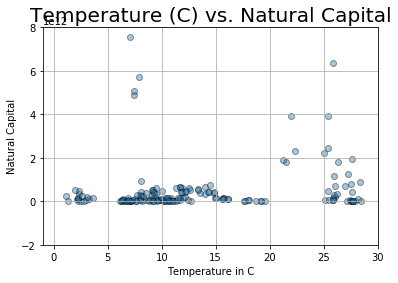

In [22]:
#populating data for scatter plot
combined_temp = combined_df.iloc[:,0]
combined_nat_cap= combined_df.iloc[:,1]
combined_agr_cap= combined_df.iloc[:,2]
combined_wel_cap= combined_df.iloc[:,3]


#scatter plot comparing Temp vs Natural Capital
plt.scatter(combined_temp, combined_nat_cap, alpha=0.4, edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Natural Capital")
plt.ylabel("Natural Capital")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-2e12, 8e12)
plt.xlim(-1, 30)

(-1, 30)

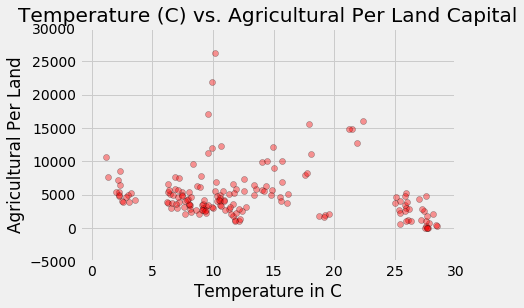

In [23]:
#scatter plot comparing Temp vs Agriculture
plt.scatter(combined_temp, combined_agr_cap, alpha=0.4, color="red", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Agricultural Per Land Capital")
plt.ylabel("Agricultural Per Land")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-5000, 30000)
plt.xlim(-1, 30)

(-1, 30)

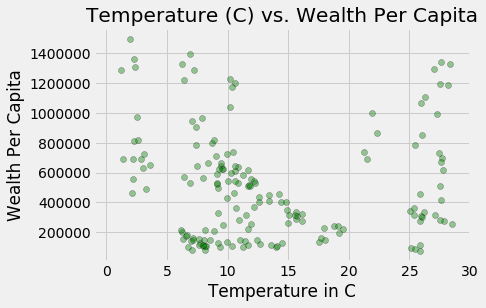

In [25]:
#scatter plot comparing Temp vs Wealth Per Capita
plt.scatter(combined_temp, combined_wel_cap, alpha=0.4, color="green", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Wealth Per Capita")
plt.ylabel("Wealth Per Capita")
plt.xlabel("Temperature in C")
plt.grid(True)
#plt.ylim(2e3, 30000)
plt.xlim(-1, 30)

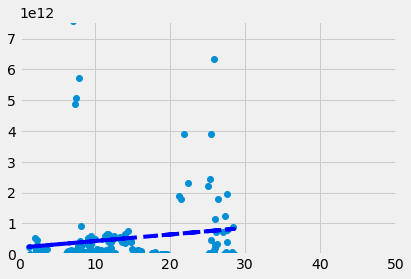

0.06062460108149601


In [39]:
#plotting linear reggression for Natural Capital and finding the P value
(slope, intercept, r_value, p_value, std_err) = linregress(combined_df['Temperture in C'], combined_df['Natural Capital'])
fit = slope * combined_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined_df['Natural Capital']), max(combined_df['Natural Capital']))
ax.plot(combined_df['Temperture in C'], combined_df['Natural Capital'], linewidth=0, marker='o')
ax.plot(combined_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)

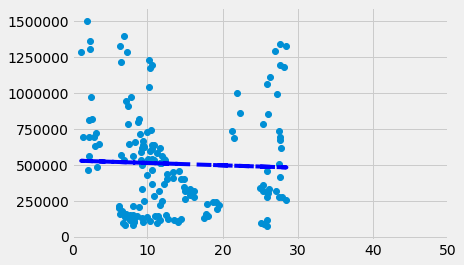

0.6421833712227446


In [41]:
#plotting linear reggression for Wealth per Capita and finding the P value
(slope, intercept, r_value, p_value, std_err) = linregress(combined_df['Temperture in C'], combined_df["Wealth per Capita"])
fit = slope * combined_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined_df["Wealth per Capita"])-100000, max(combined_df["Wealth per Capita"])+100000)
ax.plot(combined_df['Temperture in C'], combined_df["Wealth per Capita"], linewidth=0, marker='o')
ax.plot(combined_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)

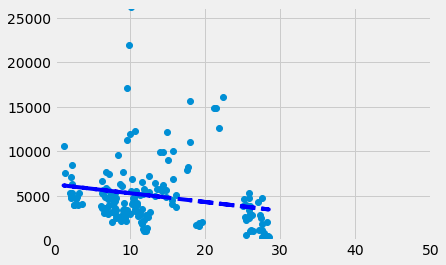

0.009984772801567638


In [46]:
#plotting linear reggression for Agricultural land per Capita and finding the P value
(slope, intercept, r_value, p_value, std_err) = linregress(combined_df['Temperture in C'], combined_df["Agricutural Land per Capita"])
fit = slope * combined_df['Temperture in C'] + intercept
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(min(combined_df["Agricutural Land per Capita"]), max(combined_df["Agricutural Land per Capita"]))
ax.plot(combined_df['Temperture in C'], combined_df["Agricutural Land per Capita"], linewidth=0, marker='o')
ax.plot(combined_df['Temperture in C'], fit, 'b--')
plt.show()
print(p_value)

(-1, 10)

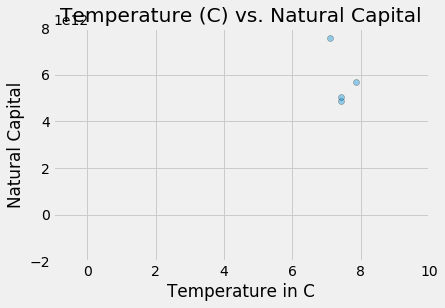

In [47]:
#USA scatter Nat Cap
usa_df = pd.DataFrame(combined_df.loc['United States'])
usa_temp = usa_df.iloc[:,0]
usa_nat_cap= usa_df.iloc[:,1]
usa_agr_cap= usa_df.iloc[:,2]
usa_wel_cap= usa_df.iloc[:,3]
plt.scatter(usa_temp, usa_nat_cap, alpha=0.4, edgecolors='black', label="City"),


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Natural Capital")
plt.ylabel("Natural Capital")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-2e12, 8e12)
plt.xlim(-1, 10)

(0, 16)

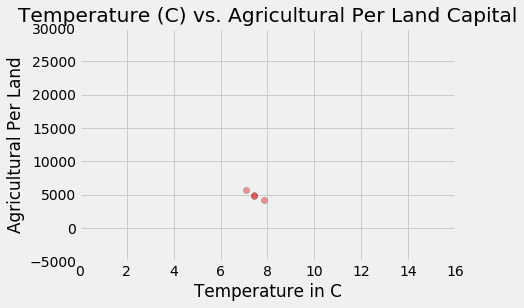

In [48]:
#USA Agricultural 
plt.scatter(usa_temp, usa_agr_cap, alpha=0.4, color="red", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Agricultural Per Land Capital")
plt.ylabel("Agricultural Per Land")
plt.xlabel("Temperature in C")
plt.grid(True)
plt.ylim(-5000, 30000)
plt.xlim(0, 16)

(0, 16)

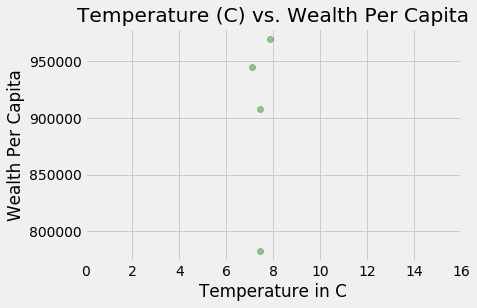

In [49]:
#USA wealth
plt.scatter(usa_temp, usa_wel_cap, alpha=0.4, color="green", edgecolors='black', label="City")


plt.style.use('fivethirtyeight')
plt.title(f"Temperature (C) vs. Wealth Per Capita")
plt.ylabel("Wealth Per Capita")
plt.xlabel("Temperature in C")
plt.grid(True)
#plt.ylim(2e3, 30000)
plt.xlim(0, 16)